In [9]:
%matplotlib notebook

# Birthday paradox

**Problem 1a.** During exercise session, we showed that for $d$ equally likely dates in a year and $n$ people, the probability of a repeat date is $p(n)=1-\frac{d^\underline{n}}{d^n}$. We also derived a simple approximate formula for this probability: $p_a(n) = 1-e^{-\frac{n(n-1)}{2d}}$. In particular, this approximation implies that for $d=365$ dates, $p(n)$ is close to $\frac{1}{2}$ for $n=23$.

Verify how good the approximation is. To this end, write a program that computes the exact value of $p(n)$ as well as the value of the approximation $p_a(n)$ for $d=365$ and $n=1,\ldots,60$. Plot the graphs of the two functions.

<IPython.core.display.Javascript object>


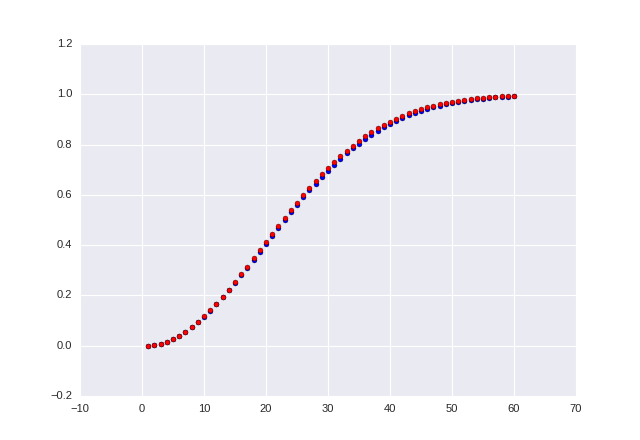

In [20]:
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn; seaborn.set()

n = 60
d = 365

def falling_factorial(d, n):
    r = 1
    for i in range(d, d - n, -1):
        r *= i
    return r / (d**n)
    
    
def real_value(n, d=365):
    i = 1
    while i <= n:
        yield 1 - falling_factorial(d, i)
        i += 1

    
def approximation(n, d=365):
    i = 1
    while i <= n:
        yield 1 - (math.e ** (-(i*(i-1) / (2*d))))
        i += 1
        
        
x = np.arange(1, n+1)        
appx = np.array(list(approximation(n)))
real = np.array(list(real_value(n)))
    
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x, appx)
ax1.scatter(x, real, c='r')

**Problem 1b.**
Implement a function, that chooses random dates out of $1,\ldots,d$ until a repeat occurs. The function should return the number of the step in which that happened. Run the function $N=100\,000$ times. 
    * Plot a histogram of the return values.
    * Which return value seems most likely? 
    * What is the average of the return values?
    * Is there any simple relation between these two numbers and the value $23$ in the previous problem?
    * Is there any simple relation between the histogram obtained, and the plot in the previous problem?

mean:  24.67452
median:  23.0
mode:  22


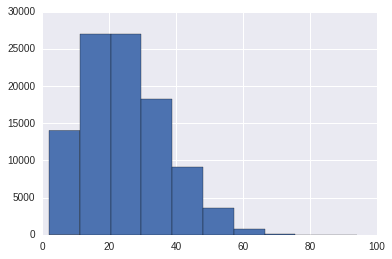

In [22]:
import random
from scipy import stats

N = 100000
def times_before_repeat_occurs():
    s = set()
    n = 0
    
    while True:
        n += 1
        pick = random.randint(1, 365)
        
        if pick in s:
            return n
        else:
            s |= {pick}

results = np.array([times_before_repeat_occurs() for i in range(1, N+1)])
plt.hist(results)

print('mean: ', np.mean(results))
print('median: ', np.median(results))
print('mode: ', *(stats.mode(results)[0]))


**Problem 1c.** Here we investigate how our analysis using the classical approach compares to a more empirical one. The file *us_births_69_88.csv* contains the counts for birthdates from 1969 to 1988. Only those births, for which the full date is known, are included in the file.
    * Read the file.
    * Investigate the data. Do you notice anything strange?
    * Plot a heatmap of the data. Do you notice any significant deviations from the uniform assumption? Can you explain them?
    * Implement a sampling function as in 1b, but this time using the supplied data. Compare the results.

In [18]:
import pandas as pd

data = pd.read_csv('us_births_69_88.csv')
data

,month,day,births
0,1,1,160369
1,1,2,169896
2,1,3,180036
3,1,4,182854
4,1,5,184145
5,1,6,186726
6,1,7,188277
7,1,8,185186
8,1,9,181511
9,1,10,183668


<IPython.core.display.Javascript object>


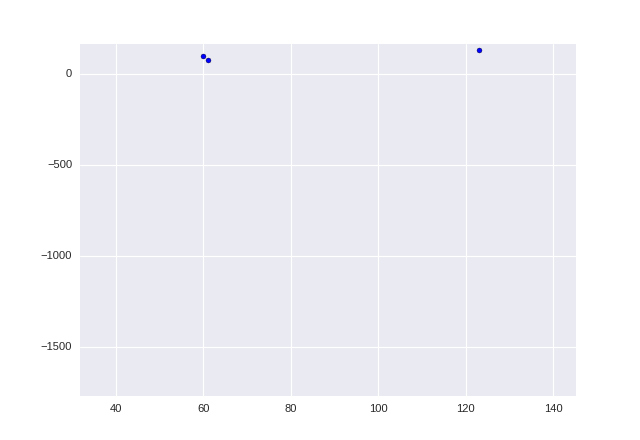

In [21]:
%matplotlib notebook
plt.scatter(np.arange(372), data['births'])